# Plot the global cases and per continent

# Task #4: Smoothing the noisy data

**Import necessary packages and functions.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

import glob
import os

In [2]:
covid = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-08-27.xlsx")
covid.rename(columns = {'dateRep': 'DateRep', 'day':'Day', 'month':'Month','year':'Year','cases':'Cases','deaths':'Deaths', 'popData2019':'Population', 'countriesAndTerritories': 'Country', 'continentExp':'Continent'}, inplace = True)

In [3]:
covid

,DateRep,Day,Month,Year,Cases,Deaths,Country,geoId,countryterritoryCode,Population,Continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-08-27,27,8,2020,55,4,Afghanistan,AF,AFG,38041757.0,Asia,2.053007
1,2020-08-26,26,8,2020,1,0,Afghanistan,AF,AFG,38041757.0,Asia,2.108210
2,2020-08-25,25,8,2020,71,10,Afghanistan,AF,AFG,38041757.0,Asia,2.670749
3,2020-08-24,24,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
4,2020-08-23,23,8,2020,105,2,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
...,...,...,...,...,...,...,...,...,...,...,...,...
38906,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38907,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38908,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38909,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


**Perform the groupby aggregation to sum the 'Cases' and 'Deaths' over Date and
Continent (notice that here we use the original data, not the cumulative).**

In [4]:
covid_daily_per_continent = covid.groupby(['DateRep','Continent'])[['Cases', 'Deaths']].sum()
covid_daily_per_continent

Cases  Deaths
DateRep    Continent                
2019-12-31 Africa          0       0
           America         0       0
           Asia           27       0
           Europe          0       0
           Oceania         0       0
...                      ...     ...
2020-08-27 Africa       8870     321
           America    132035    3953
           Asia       103082    1597
           Europe      23931     394
           Oceania       338      24

[1269 rows x 2 columns]

**Generate the cumulative sum of Cases and Deaths per Continent.**

In [5]:
covid_daily_per_continent_cumulative = covid_daily_per_continent.groupby(['Continent']).cumsum()
covid_daily_per_continent.reset_index(inplace=True)
covid_daily_per_continent_cumulative.reset_index(inplace=True)
covid_daily_per_continent_cumulative

,DateRep,Continent,Cases,Deaths
0,2019-12-31,Africa,0,0
1,2019-12-31,America,0,0
2,2019-12-31,Asia,27,0
3,2019-12-31,Europe,0,0
4,2019-12-31,Oceania,0,0
...,...,...,...,...
1264,2020-08-27,Africa,1212699,28609
1265,2020-08-27,America,12910547,455566
1266,2020-08-27,Asia,6529270,133503
1267,2020-08-27,Europe,3522921,207818


**Generate the global sum aggregation.**

In [6]:
covid_daily_global = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum()
covid_daily_global.reset_index(inplace=True)
covid_daily_global

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
...,...,...,...
236,2020-08-23,266465,5633
237,2020-08-24,224497,3322
238,2020-08-25,220357,4538
239,2020-08-26,254705,6374


**Generate the cumulative sum at the global level.**

In [7]:
covid_daily_global_cumulative = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum().cumsum()
covid_daily_global_cumulative.reset_index(inplace=True)
covid_daily_global_cumulative

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,27,0
3,2020-01-03,44,0
4,2020-01-04,44,0
...,...,...,...
236,2020-08-23,23236871,805567
237,2020-08-24,23461368,808889
238,2020-08-25,23681725,813427
239,2020-08-26,23936430,819801


**Define two functions to convert values of millions and thousands to M and k format,
respectively. E.g. 1,000,000 will be represented in the graph as 1M and 1,000 as 1k.**

In [8]:
# TO CONVERT THE MILLIONS IN THE Y-AXIS TO 1M, 2M, etc
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)
formatter_mil = FuncFormatter(millions)

# TO CONVERT THE THOUSANDS IN THE Y-AXIS TO 1K, 2K, etc
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-3)
formatter_kil = FuncFormatter(thousands)

**Configure the x-axis ticks format. Here, we want to show the months instead of Day
from 100 cases. The format specified here takes care of that.**

In [9]:
# TO PLOT MTH IN THE X-AXIS
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

**Create the data frame with the values on the last day. This will be helpful to annotate
the graphs. Also, generate the list of the continents.**

In [10]:
last_day_covid = covid_daily_per_continent[covid_daily_per_continent['DateRep'] == covid_daily_per_continent['DateRep'].max()]
last_day_covid

,DateRep,Continent,Cases,Deaths
1264,2020-08-27,Africa,8870,321
1265,2020-08-27,America,132035,3953
1266,2020-08-27,Asia,103082,1597
1267,2020-08-27,Europe,23931,394
1268,2020-08-27,Oceania,338,24


In [11]:
last_day_covid_cumulative = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['DateRep'] == covid_daily_per_continent_cumulative['DateRep'].max()]
last_day_covid_cumulative

,DateRep,Continent,Cases,Deaths
1264,2020-08-27,Africa,1212699,28609
1265,2020-08-27,America,12910547,455566
1266,2020-08-27,Asia,6529270,133503
1267,2020-08-27,Europe,3522921,207818
1268,2020-08-27,Oceania,28553,587


In [12]:
continents = last_day_covid['Continent'].to_list()

**Generate the 2x2 subplots of the daily and cumulative cases for continents and globally.**

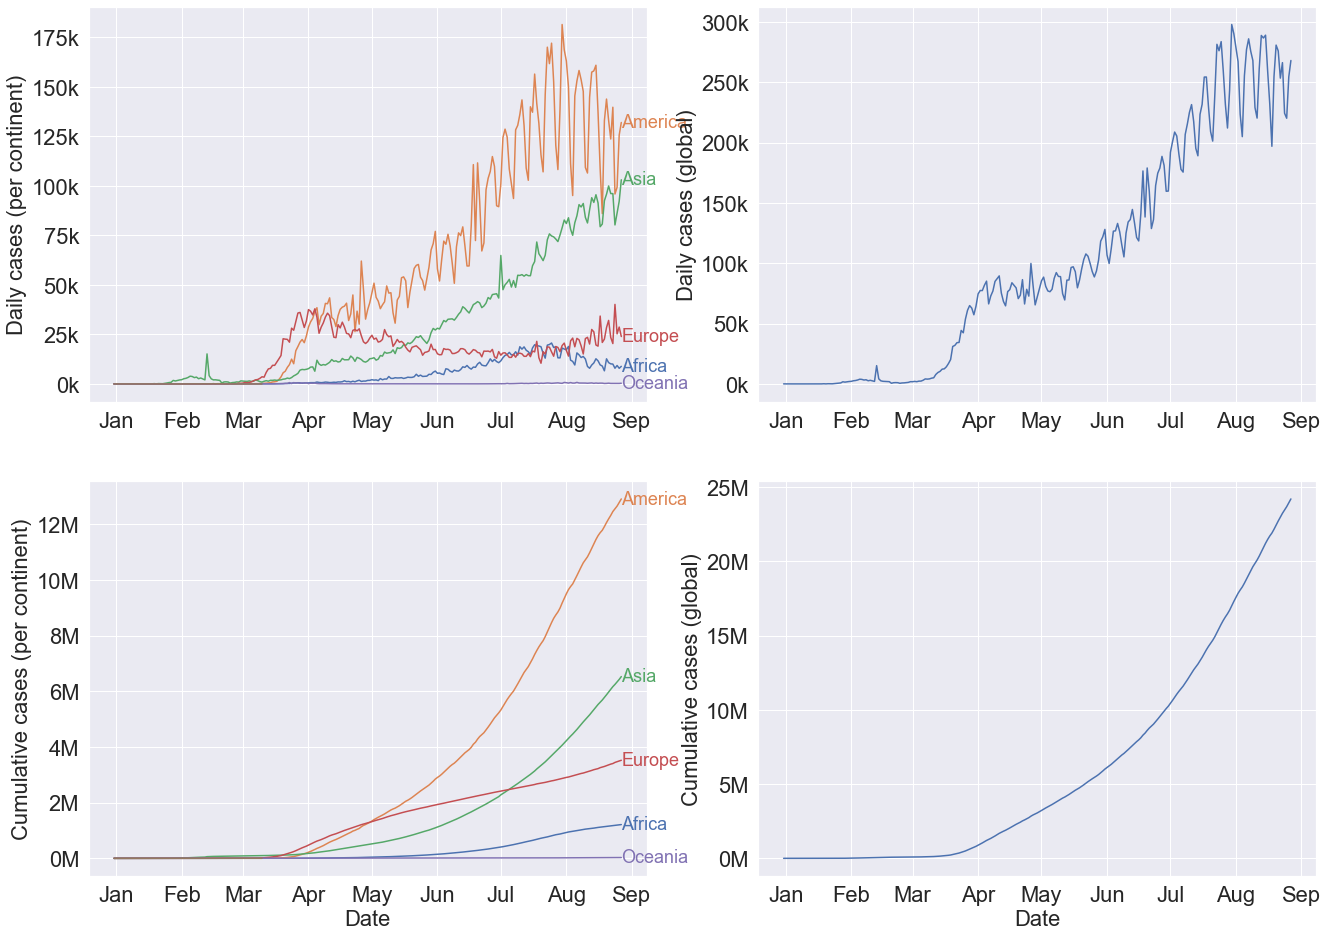

In [13]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)


# Task #4: Smoothing the noisy data

In [14]:
covid_daily_per_continent['Continent'].unique()

array(['Africa', 'America', 'Asia', 'Europe', 'Oceania', 'Other'],
      dtype=object)

In [15]:
covid_daily_per_continent.groupby('Continent')

In [16]:
africa = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='Africa']
africa['Cases_rolling'] = africa['Cases'].rolling(7).mean()
america = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='America']
america['Cases_rolling'] = america['Cases'].rolling(7).mean()
asia = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='Asia']
asia['Cases_rolling'] = asia['Cases'].rolling(7).mean()
europe = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='Europe']
europe['Cases_rolling'] = europe['Cases'].rolling(7).mean()
oceania = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='Oceania']
oceania['Cases_rolling'] = oceania['Cases'].rolling(7).mean()
other = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='Other']
other['Cases_rolling'] = other['Cases'].rolling(7).mean()

<ipython-input-16-4395cfeb59e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa['Cases_rolling'] = africa['Cases'].rolling(7).mean()
<ipython-input-16-4395cfeb59e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  america['Cases_rolling'] = america['Cases'].rolling(7).mean()
<ipython-input-16-4395cfeb59e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [17]:
covid_daily_global['Cases_rolling'] = covid_daily_global['Cases'].rolling(7).mean()

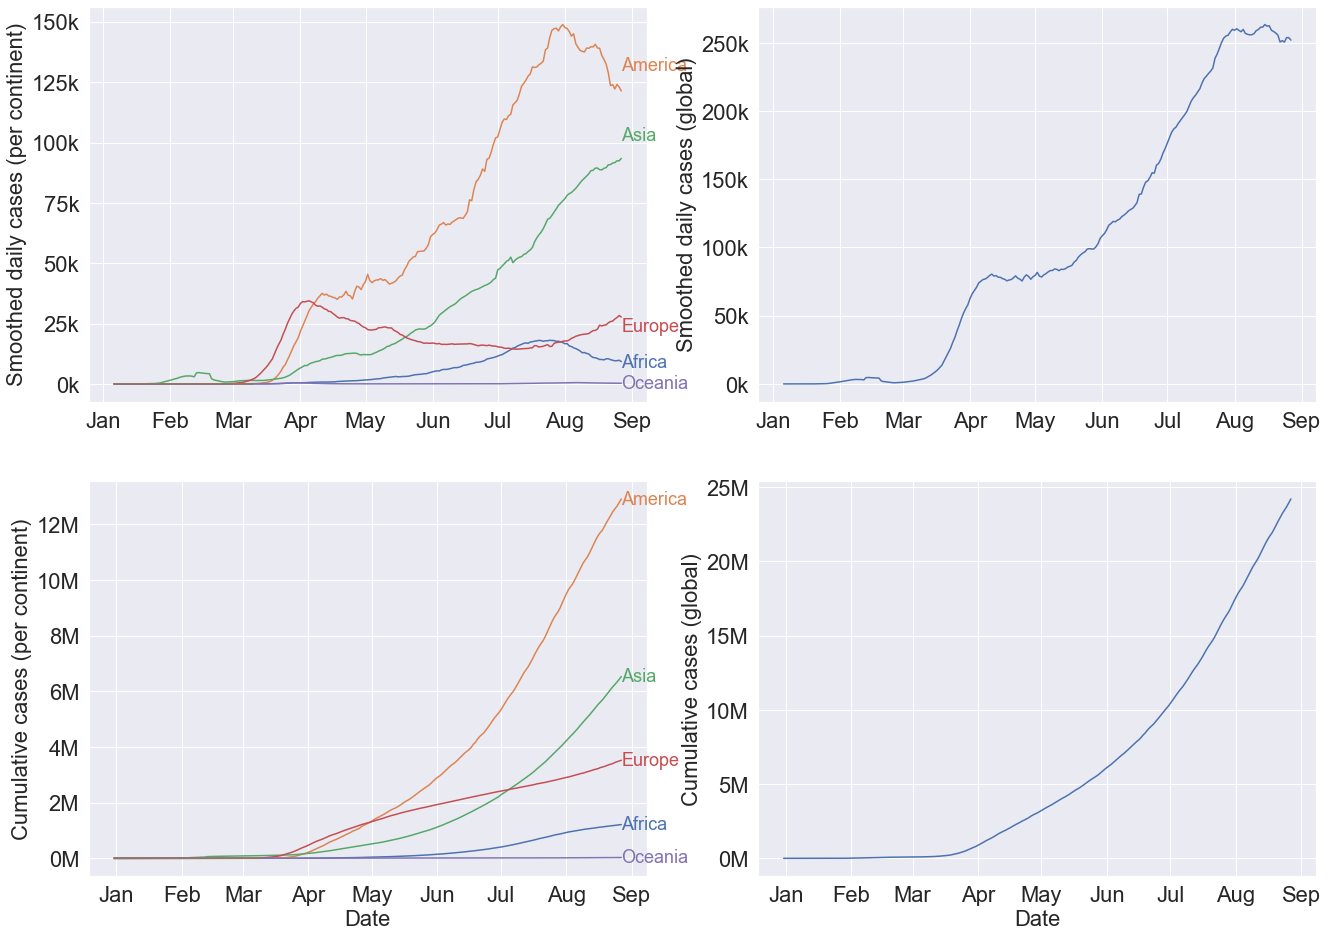

In [18]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Cases_rolling", data=africa, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
ax1 = sns.lineplot(x="DateRep", y="Cases_rolling", data=america, markers=True, legend=False, ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="Cases_rolling", data=asia, markers=True, legend=False, ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="Cases_rolling", data=europe, markers=True, legend=False, ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="Cases_rolling", data=oceania, markers=True, legend=False, ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="Cases_rolling", data=other, markers=True, legend=False, ax=axes[0, 0])
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Smoothed daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Cases_rolling", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Smoothed daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_1_Machavolu_Manoj Chandra.png')

## In a separate 2x2 subplots graph show the 7-day smoothed plots of the daily mor-talities and the cumulative mortalities.

**First, the graph is plotted without smoothing for mortalities to understand how much deviation or noisy pattern is produced** 

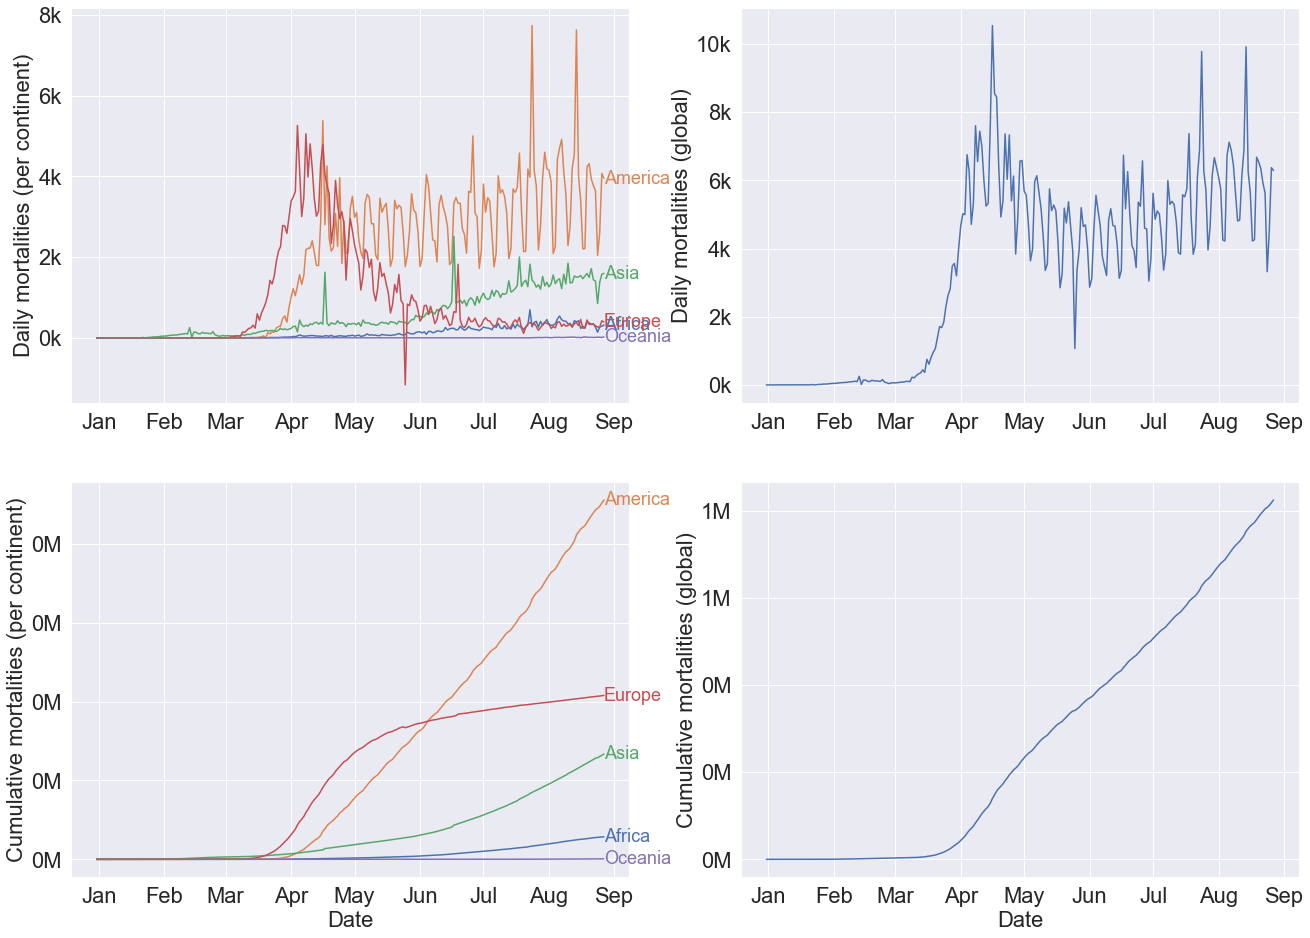

In [19]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily mortalities (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative mortalities (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily mortalities (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative mortalities (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

Since, the top 2 plots clearly shows a noisy pattern, smoothing has to be done to exclude or average the noisy data.

## Smoothing data for mortalities

In [20]:
africa = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='Africa']
africa['Deaths_rolling'] = africa['Deaths'].rolling(7).mean()
america = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='America']
america['Deaths_rolling'] = america['Deaths'].rolling(7).mean()
asia = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='Asia']
asia['Deaths_rolling'] = asia['Deaths'].rolling(7).mean()
europe = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='Europe']
europe['Deaths_rolling'] = europe['Deaths'].rolling(7).mean()
oceania = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='Oceania']
oceania['Deaths_rolling'] = oceania['Deaths'].rolling(7).mean()
other = covid_daily_per_continent.loc[covid_daily_per_continent['Continent']=='Other']
other['Deaths_rolling'] = other['Deaths'].rolling(7).mean()

<ipython-input-20-f671ee122c1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa['Deaths_rolling'] = africa['Deaths'].rolling(7).mean()
<ipython-input-20-f671ee122c1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  america['Deaths_rolling'] = america['Deaths'].rolling(7).mean()
<ipython-input-20-f671ee122c1e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [21]:
covid_daily_global['Deaths_rolling'] = covid_daily_global['Deaths'].rolling(7).mean()

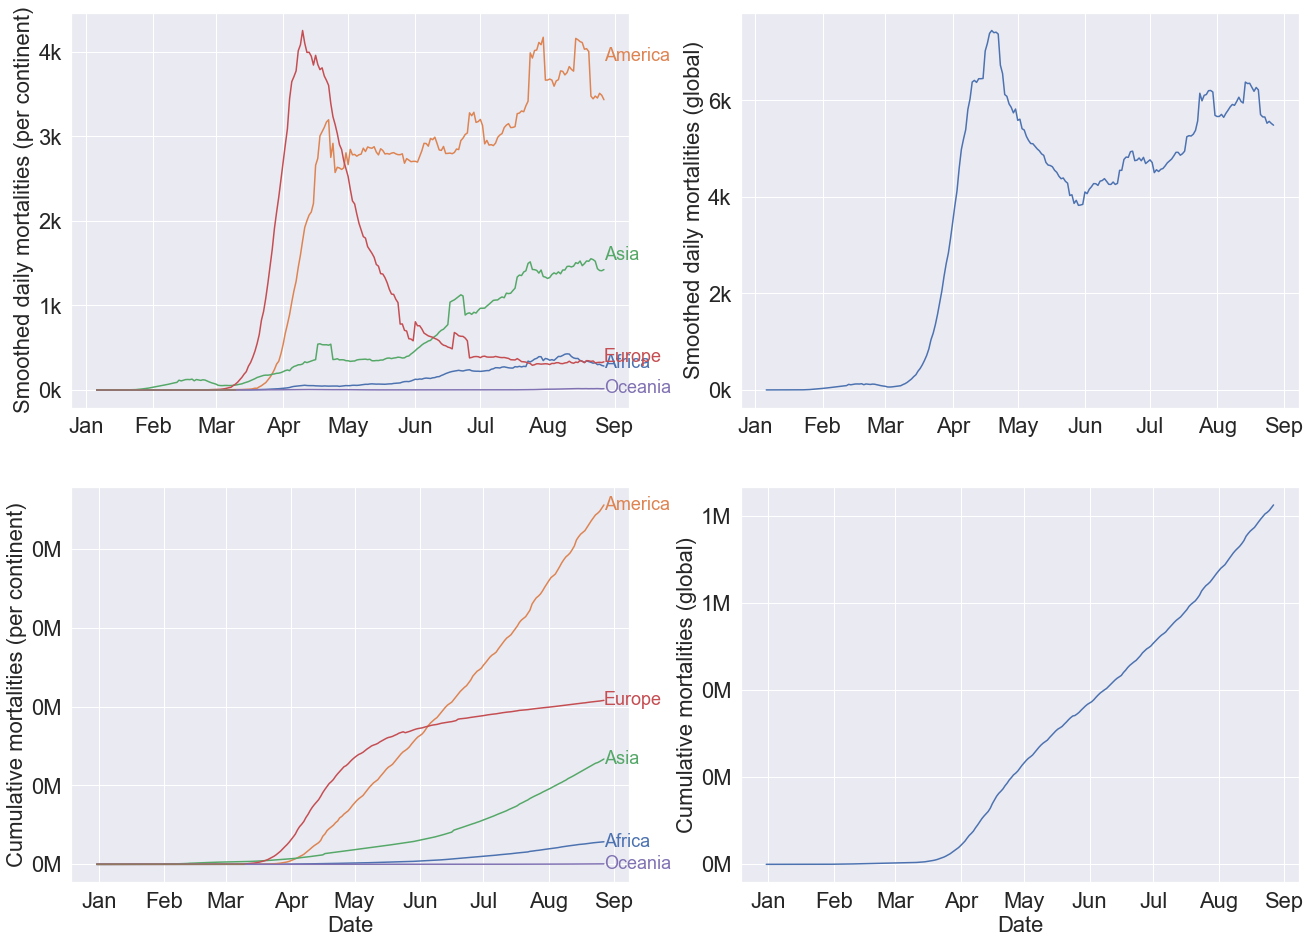

In [22]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Deaths_rolling", data=africa, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
ax1 = sns.lineplot(x="DateRep", y="Deaths_rolling", data=america, markers=True, legend=False, ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="Deaths_rolling", data=asia, markers=True, legend=False, ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="Deaths_rolling", data=europe, markers=True, legend=False, ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="Deaths_rolling", data=oceania, markers=True, legend=False, ax=axes[0, 0])
ax1 = sns.lineplot(x="DateRep", y="Deaths_rolling", data=other, markers=True, legend=False, ax=axes[0, 0])
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Smoothed daily mortalities (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative mortalities (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Deaths_rolling", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Smoothed daily mortalities (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative mortalities (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_2_Machavolu_Manoj Chandra.png')